In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ayush\anaconda3.1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Expanded_data_with_more_features.csv\Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [6]:
df = df.drop("Unnamed: 0", axis=1)

# Gender Distribution of Students

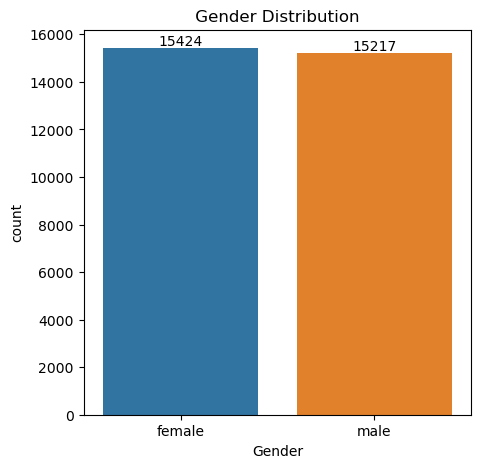

In [7]:
plt.figure(figsize=(5,5))
a = sns.countplot(data= df, x= df["Gender"])
a.bar_label(a.containers[0])
plt.title(" Gender Distribution ")
plt.show()

# From the above chart we can say that the number of female students are greater than Number of male students.

# Impact of Parent Education on different test scores

In [8]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


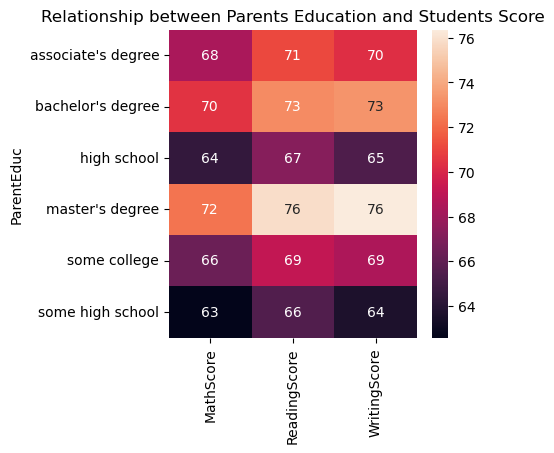

In [9]:
plt.figure(figsize=(4,4))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parents Education and Students Score")
plt.show()

# From above chart we conclude that parents education has significant impact on students scores. 

# Impact of Parents Marital Status on students performance

In [10]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


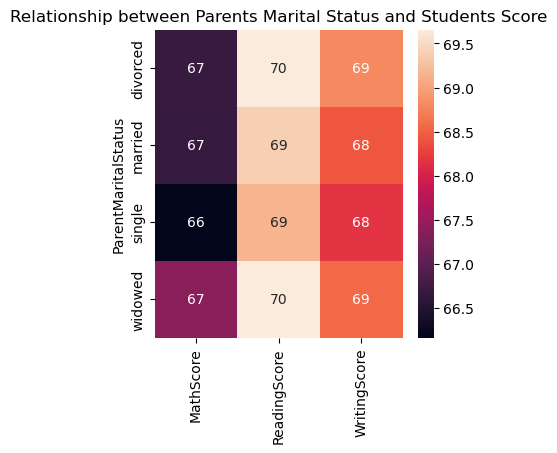

In [11]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parents Marital Status and Students Score")
plt.show()

# From the above chart we see that parents marital status has negligible impact on students score.

# Outlier Detection

<AxesSubplot:xlabel='MathScore'>

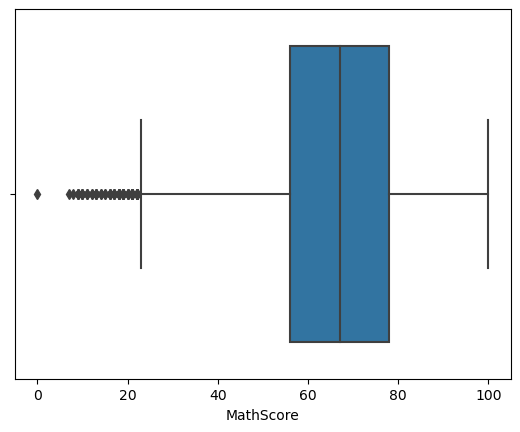

In [12]:
sns.boxplot(data=df, x= "MathScore")

<AxesSubplot:xlabel='ReadingScore'>

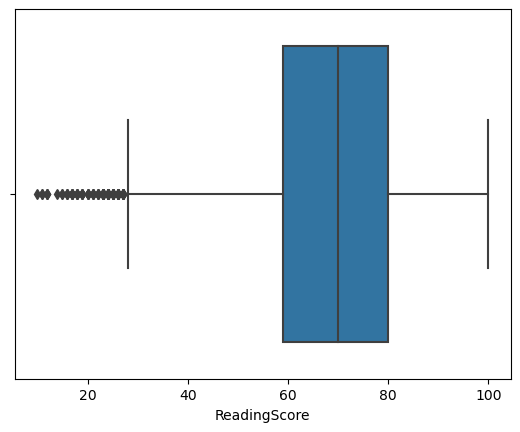

In [13]:
sns.boxplot(data=df, x= "ReadingScore")

<AxesSubplot:xlabel='WritingScore'>

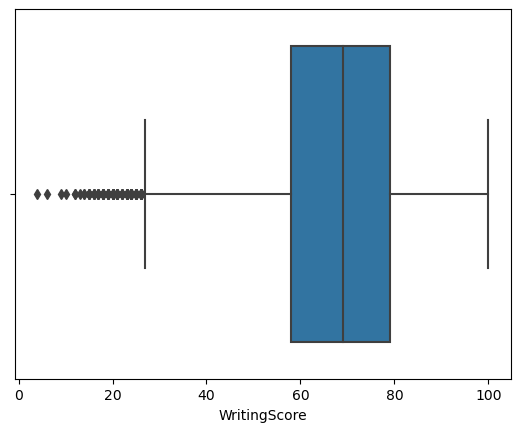

In [14]:
sns.boxplot(data=df, x= "WritingScore")

From above 3 boxplots we can conclude that scoring in maths is difficult than scorng in other subjects.

# Distribution of Test Scores

Text(0.5, 1.0, 'Distribution of Maths Test Score')

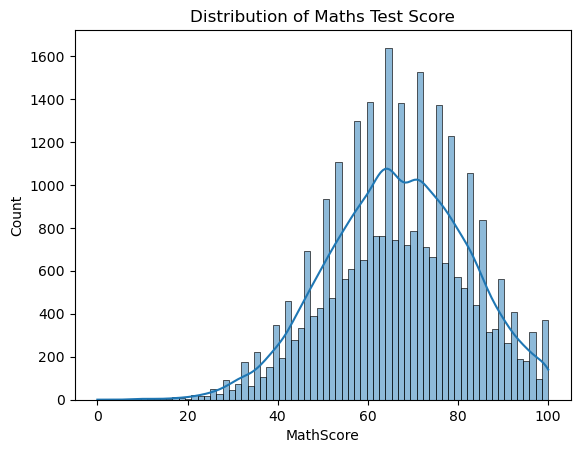

In [15]:
sns.histplot(data=df, x='MathScore', kde=True)
plt.title("Distribution of Maths Test Score")

Text(0.5, 1.0, 'Distribution of Maths Test Score')

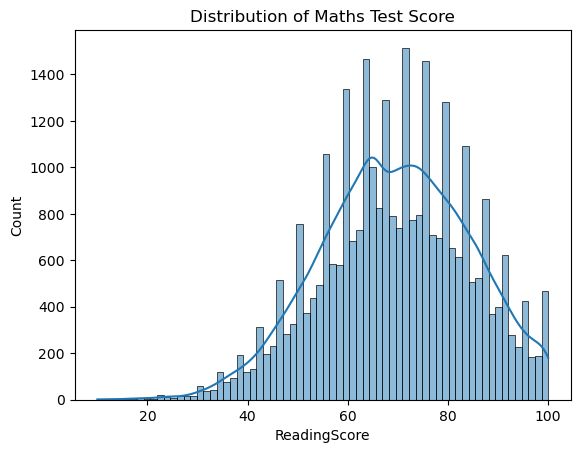

In [16]:
sns.histplot(data=df, x='ReadingScore', kde=True)
plt.title("Distribution of Maths Test Score")

Text(0.5, 1.0, 'Distribution of Maths Test Score')

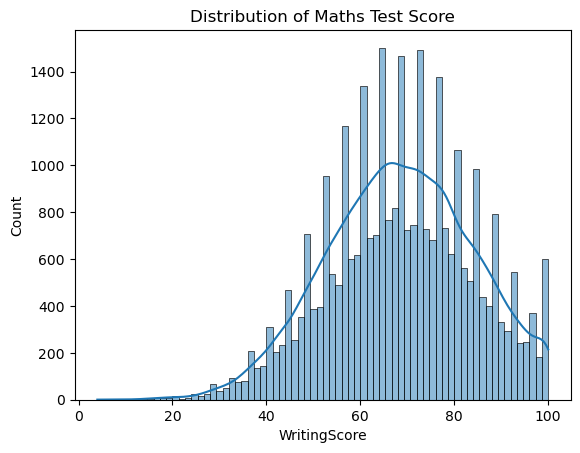

In [17]:
sns.histplot(data=df, x='WritingScore', kde=True)
plt.title("Distribution of Maths Test Score")

Histogram gives us the idea about the distribution of test scores in various subjects.

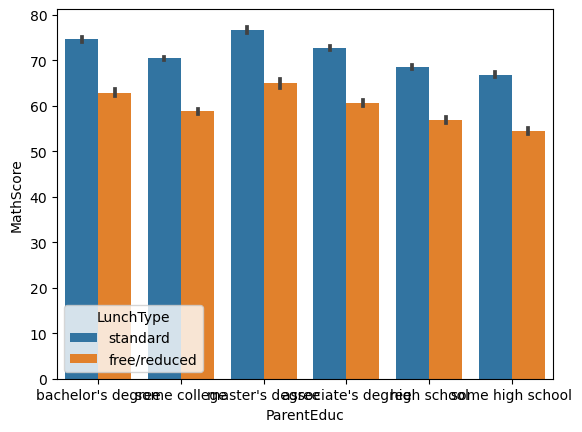

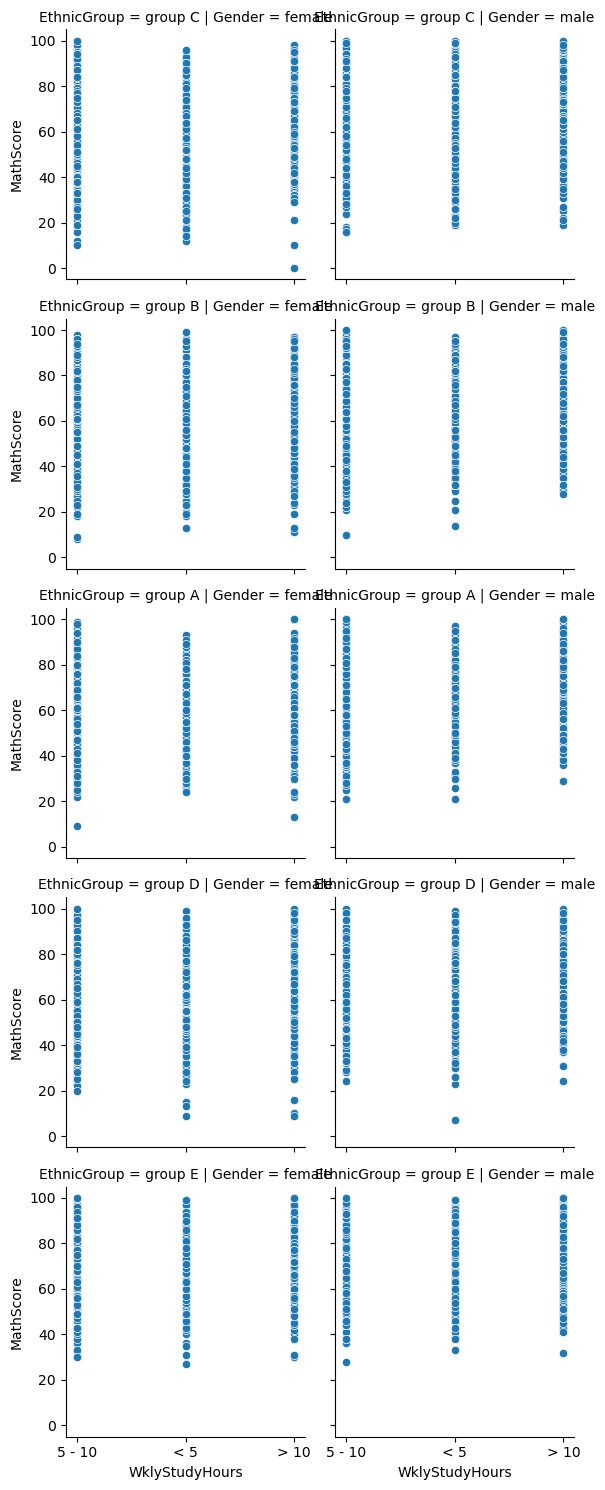

In [18]:
sns.barplot(data=df, x='ParentEduc', y='MathScore', hue='LunchType')
g = sns.FacetGrid(df, col='Gender', row='EthnicGroup')
g.map(sns.scatterplot, 'WklyStudyHours', 'MathScore')

# Correlation Analysis

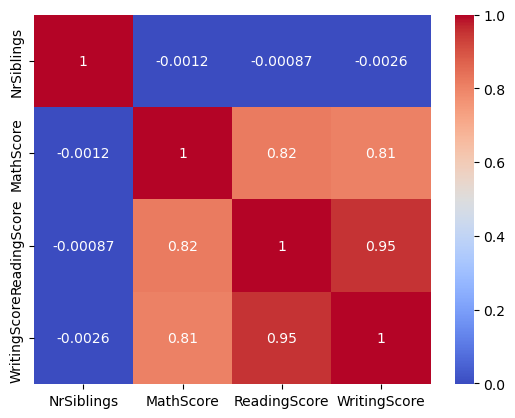

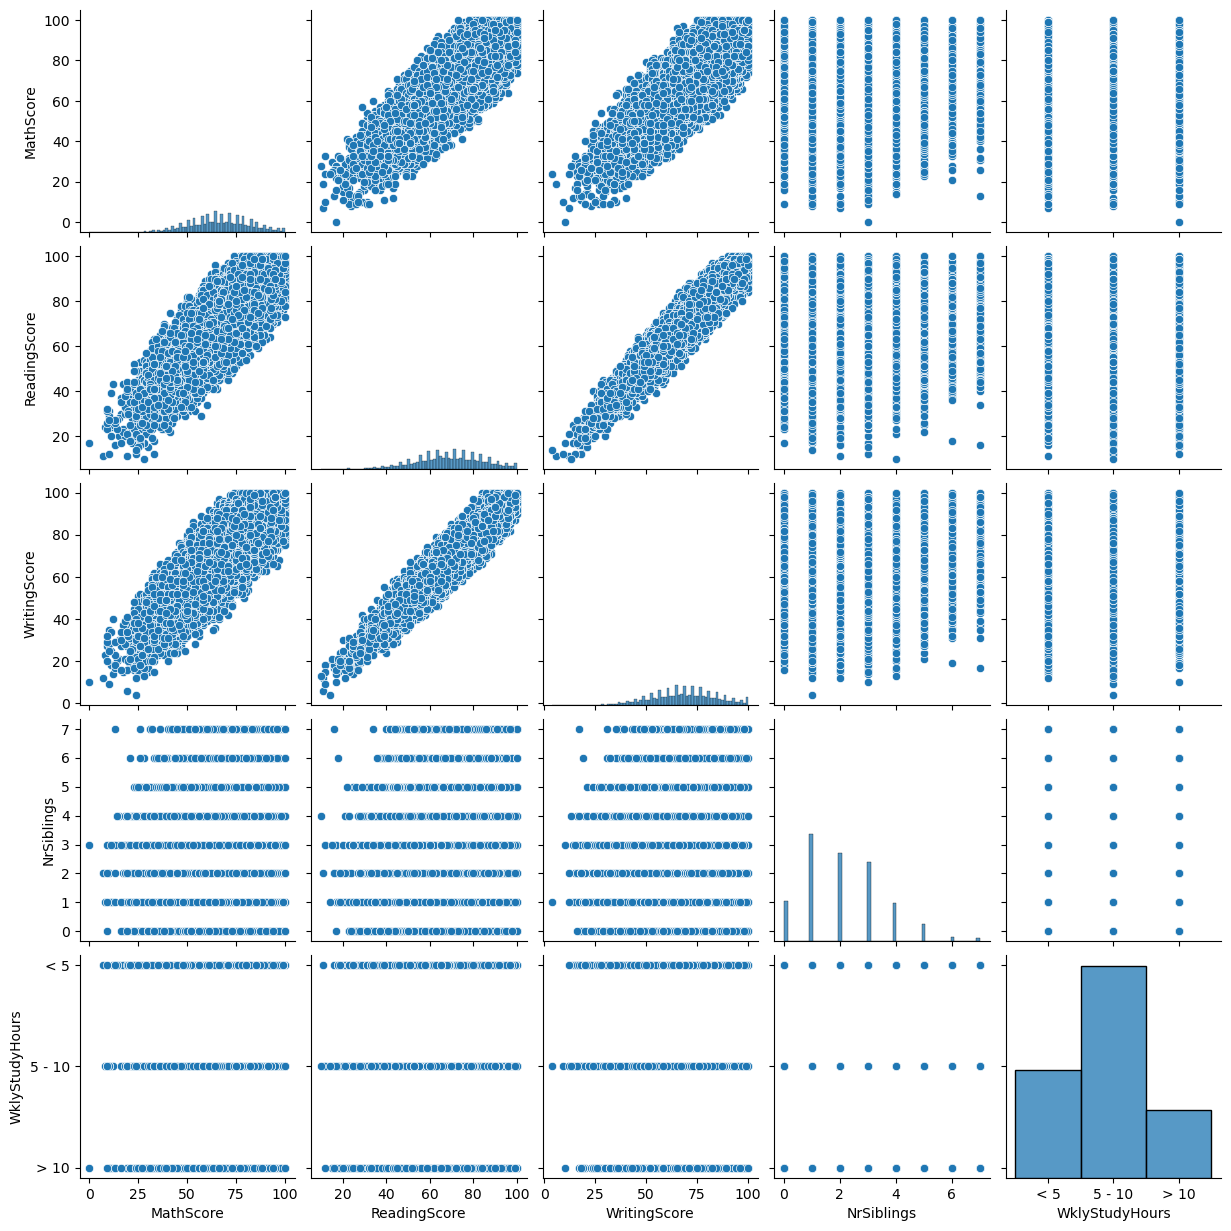

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
sns.pairplot(df, vars=['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings', 'WklyStudyHours'])


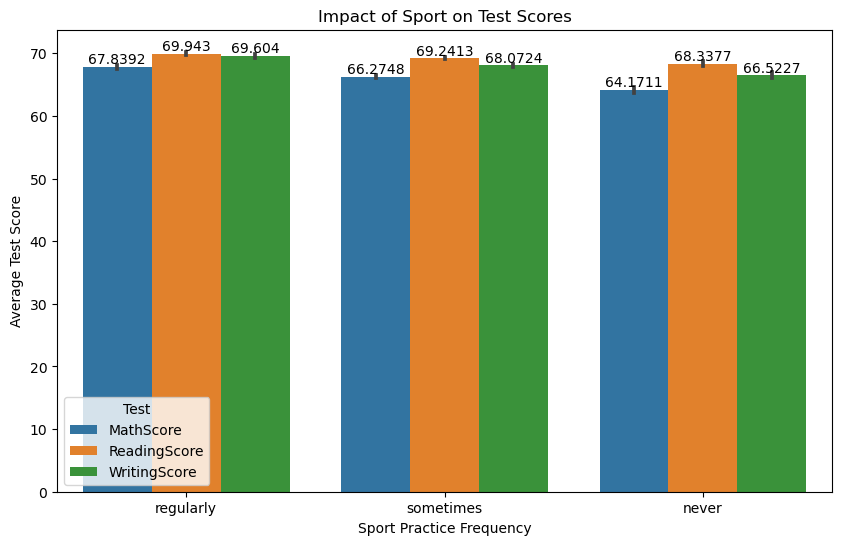

In [20]:

df_melted = df.melt(id_vars=["PracticeSport"], value_vars=["MathScore", "ReadingScore", "WritingScore"],
                    var_name="Test", value_name="Score")


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='PracticeSport', y='Score', hue='Test')

plt.title('Impact of Sport on Test Scores')
plt.xlabel('Sport Practice Frequency')
plt.ylabel('Average Test Score')

for container in ax.containers:
    ax.bar_label(container)


# Distribution of Ethnic Group

In [21]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


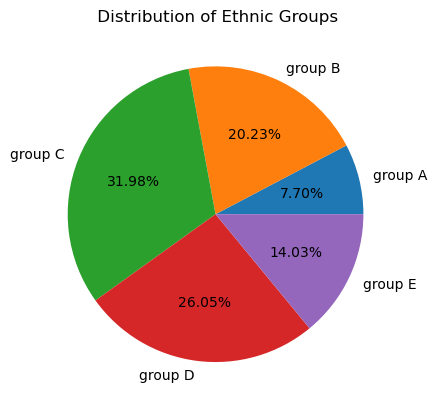

In [22]:
groupA = df.loc[(df['EthnicGroup']== 'group A')].count()
groupB = df.loc[(df['EthnicGroup']== 'group B')].count()
groupC = df.loc[(df['EthnicGroup']== 'group C')].count()
groupD = df.loc[(df['EthnicGroup']== 'group D')].count()
groupE = df.loc[(df['EthnicGroup']== 'group E')].count()

l= ["group A","group B","group C","group D","group E"]

List = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.title(" Distribution of Ethnic Groups")
plt.pie(List,labels=l,autopct = "%1.2f%%")
plt.show()

#From above pie chart we can say that ethnic group c has most distribution and ethnic group A has least distribution.